In [1]:
from autoencoders import *
from pdb_utils import *

In [2]:
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
structures = parsePdbFiles("PDBs")
print len(structures)

1385


In [1]:
import pickle
with open('pdb_groups.pkl', 'r') as f:
    pdb_groups = pickle.load(f)

In [63]:
proteinmatrixdict = ProteinContactMapDict(structures, resize_to=(128,128), removeSymmetry=True)

d1dr9a1.pdb
d1bmld3.pdb
d1gkna1.pdb
d1ezvf_.pdb
d1fgsa2.pdb
d1dn0b1.pdb
d1a7ja_.pdb
d1bxea_.pdb
d1c9ka_.pdb
d1b0na2.pdb
d1goia3.pdb
d1e6ve1.pdb
d1b77b1.pdb
d1h2da_.pdb
d1fnfa1.pdb
d1dnla_.pdb
d1g6za1.pdb
d1evsa_.pdb
d1dcqa1.pdb
d1fuia2.pdb
d1b0xa_.pdb
d1bg3b2.pdb
d1gp3a_.pdb
d1gyta1.pdb
d1d8ka_.pdb
d1bkba1.pdb
d1eyea_.pdb
d1g9la1.pdb
d1bihb3.pdb
d1e9fa_.pdb
d1dxsa_.pdb
d1g3ng2.pdb
d1f1zb1.pdb
d1c12b1.pdb
d1b89a_.pdb
d1dmza_.pdb
d1am2a_.pdb
d1dqdh1.pdb
d1f0pa_.pdb
d1a8ha1.pdb
d1eg4a1.pdb
d1gkaa_.pdb
d1cnt4_.pdb
d1gqea_.pdb
d1e3ja2.pdb
d1bifa1.pdb
d1ddma_.pdb
d1gnwb2.pdb
d1dzla_.pdb
d1f97a1.pdb
d1bihb2.pdb
d1f58h1.pdb
d1b25a2.pdb
d1fjgi_.pdb
d1gzva_.pdb
d1f39a_.pdb
d1fada_.pdb
d1f7ua2.pdb
d1blea_.pdb
d1a9na_.pdb
d1b85b_.pdb
d1gjib2.pdb
d1bg3b3.pdb
d1f81a_.pdb
d1cz5a1.pdb
d1deeb2.pdb
d1fx2a_.pdb
d1bwdb_.pdb
d1ap2b_.pdb
d1g2pa_.pdb
d1c3ga2.pdb
d1h2sb_.pdb
d1ewqa4.pdb
d1d6ta_.pdb
d1e5oe_.pdb
d1guva2.pdb
d1al02_.pdb
d1aw9a1.pdb
d1c7ya2.pdb
d1ezvc2.pdb
d1gz2a_.pdb
d1h1cc_.pdb
d1gyya_.pdb
d1f5

d1f0xb1.pdb
d1ag8a_.pdb
d1ckma1.pdb
d1cr5b2.pdb
d1d2za_.pdb
d1ewja_.pdb
d1eika_.pdb
d1dxla1.pdb
d1ffkw_.pdb
d1brwb1.pdb
d1g0sb_.pdb
d1ev0b_.pdb
d1boca_.pdb
d1cb1a_.pdb
d1bfod2.pdb
d1fqjd2.pdb
d1e7ra_.pdb
d1gc1g_.pdb
d1cjka_.pdb
d1gg4b3.pdb
d1dm9b_.pdb
d1aoya_.pdb
d1f3va_.pdb
d1bbjh1.pdb
d1d0na5.pdb
d1cz8y1.pdb
d1autl1.pdb
d1gkrb1.pdb
d1gd8a_.pdb
d1fsua_.pdb
d1dgsb1.pdb
d1ee9a2.pdb
d1b43b2.pdb
d1eepa_.pdb
d1gqna_.pdb
d1frgh1.pdb
d1gpja3.pdb
d1a6sa_.pdb
d1bvqa_.pdb
d1gh8a_.pdb
d1a21b1.pdb
d1gjwa1.pdb
d1bdfa2.pdb
d1fgnh1.pdb
d1dp5b_.pdb
d1dc1a_.pdb
d1epba_.pdb
d1gz4a2.pdb
d1c3za_.pdb
d1f32a_.pdb
d1faoa_.pdb
d1bgfa_.pdb
d1elkb_.pdb
d1cx8a3.pdb
d1gn9a_.pdb
d1gtta2.pdb
d1g8aa_.pdb
d1cf2p1.pdb
d1dwna_.pdb
d1bg6a1.pdb
d1efpd_.pdb
d1e3dc_.pdb
d1apqa_.pdb
d1b93c_.pdb
d1g4yb1.pdb
d1bs9a_.pdb
d1bm8a_.pdb
d1f6fc1.pdb
d1apja_.pdb
d1e6yd1.pdb
d1d5ih1.pdb
d1gvia1.pdb
d1gpja2.pdb
d1f53a_.pdb
d1at0a_.pdb
d1adqh1.pdb
d1ftra1.pdb
d1g2923.pdb
d1eqka_.pdb
d1fl9a_.pdb
d1a6ea3.pdb
d1914a2.pdb
d1d6sb_.pdb
d1am

d1g44a2.pdb
d1a3ca_.pdb
d1dava_.pdb
d1elva2.pdb
d1bp3a_.pdb
d1g8ka2.pdb
d1fy7a_.pdb
d1fc3a_.pdb
d1bt6a_.pdb
d1e68a_.pdb
d1di7a_.pdb
d1blfa1.pdb
d1b6aa1.pdb
d1a31a2.pdb
d1b7gq2.pdb
d1djea_.pdb
d1g31a_.pdb
d1fa0b4.pdb
d1d0ba_.pdb


In [6]:
with open('protein_matrix_dict128.pkl', 'r') as f:
    proteinmatrixdict = pickle.load(f)

In [ ]:
with open('protein_matrix_dict64.pkl', 'r') as f:
    proteinmatrixdict = pickle.load(f)

In [7]:
labels, features = proteinmatrixdict.keys(), proteinmatrixdict.values()
input_size = len(features[0])
print input_size

8128


In [8]:
new_features, loss = LinearAutoencoder(features, input_size, 500, 100, learning_rate=0.00001)

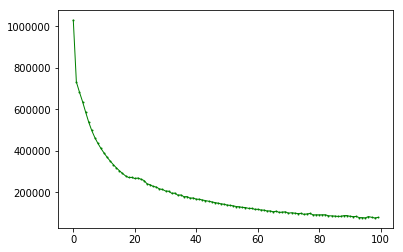

In [9]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

### Visualization

In [68]:
len(new_features[0])

500

In [21]:
new_feature_dict = dict(zip(labels,new_features)) # key: pdb name, value: 500D new feature vector

In [11]:
with open('newfeaturedict128_100epoch.pkl', 'w') as f:
    pickle.dump(new_feature_dict,f)

In [12]:
print "number of classes: ", len(set(pdb_groups.keys()))

number of classes:  797


In [14]:
selected_groups = dict(filter(lambda x: len(x[1])>10, pdb_groups.items()))

In [15]:
selected_groups.keys()

['b.1.1.2', 'b.1.1.1', 'b.1.2.1', 'c.2.1.3', 'b.1.1.4']

In [22]:
protein_vectors = []
selected_proteins = []

for group in selected_groups.keys():
    for protein in pdb_groups[group]:
        try:
            protein_vectors.append(new_feature_dict[protein+".pdb"]) # take new features of proteins
            selected_proteins.append(protein)
        except:
            continue

In [17]:
len(selected_proteins)

120

In [18]:
len(protein_vectors[0])

500

In [23]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(protein_vectors))
result_dict = dict(zip(selected_proteins, features2d))

b.1.1.2 ob 15
b.1.1.1 or 69
b.1.2.1 og 12
c.2.1.3 ok 11
b.1.1.4 om 13


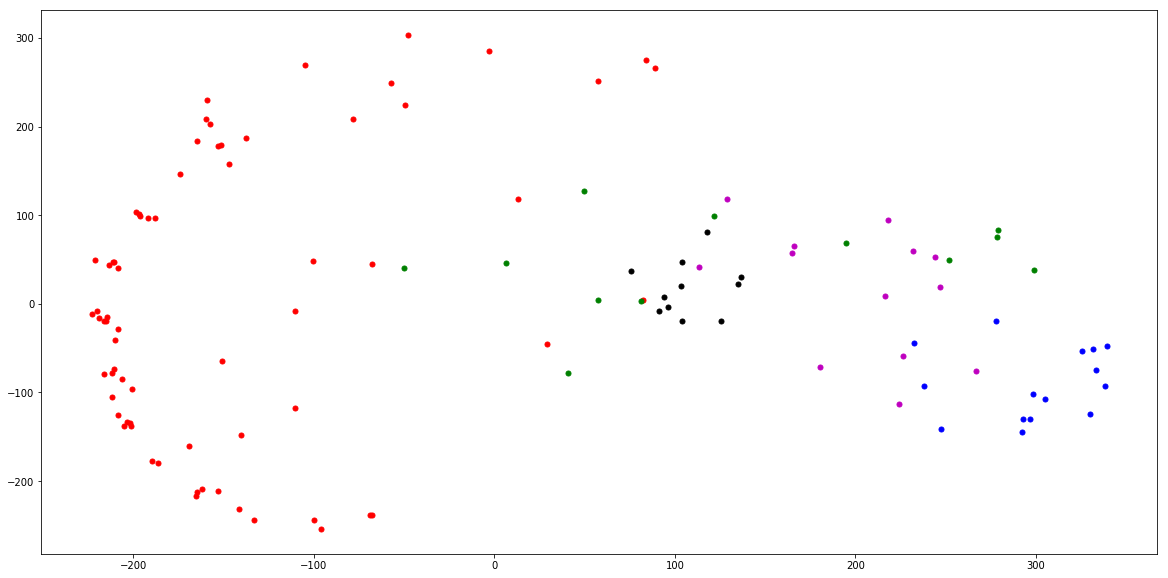

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
colors = ['ob', 'or', 'og', 'ok', "om"]
color_ix = 0

for group, proteins in selected_groups.items():
    color = colors[color_ix]
    c=0
    print group, color,
    for protein in proteins:
        try:
            f2d = result_dict[protein]
            ax.plot(f2d[0], f2d[1], color, markersize=5)
            c+=1
        except:
            continue
    print c
    color_ix+=1

plt.show()